In [158]:
!pip3 install -U ucimlrepo 

# Import the libraries needed
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline  

import hopsworks
import pandas as pd

from ucimlrepo import fetch_ucirepo 


In [159]:
# Get the data
red_df  = pd.read_csv('./data/winequality-red.csv', sep=';')
white_df = pd.read_csv('./data/winequality-white.csv', sep=';')

# Combine the data and add a column feature for the type of wine
# White is 0 red is 1
white_df['type'] = "white"
red_df['type'] = "red"

Add the length of red to the indices in white_df
white_df.index = white_df.index + len(red_df)

wine_df = pd.concat([red_df, white_df])
wine_df



SyntaxError: invalid syntax. Perhaps you forgot a comma? (3694090589.py, line 10)

In [ ]:
# See if there is missing data
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5295 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  5295 non-null   int32  
 1   fixed_acidity         5295 non-null   float64
 2   volatile_acidity      5295 non-null   float64
 3   citric_acid           5295 non-null   float64
 4   residual_sugar        5295 non-null   float64
 5   chlorides             5295 non-null   float64
 6   free_sulfur_dioxide   5295 non-null   float64
 7   total_sulfur_dioxide  5295 non-null   float64
 8   density               5295 non-null   float64
 9   ph                    5295 non-null   float64
 10  sulphates             5295 non-null   float64
 11  alcohol               5295 non-null   float64
 12  quality               5295 non-null   int64  
dtypes: float64(11), int32(1), int64(1)
memory usage: 558.5 KB


In [ ]:
# Drop all the rows with missing data
wine_df = wine_df.dropna()

# See if there is missing data
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5295 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  5295 non-null   int32  
 1   fixed_acidity         5295 non-null   float64
 2   volatile_acidity      5295 non-null   float64
 3   citric_acid           5295 non-null   float64
 4   residual_sugar        5295 non-null   float64
 5   chlorides             5295 non-null   float64
 6   free_sulfur_dioxide   5295 non-null   float64
 7   total_sulfur_dioxide  5295 non-null   float64
 8   density               5295 non-null   float64
 9   ph                    5295 non-null   float64
 10  sulphates             5295 non-null   float64
 11  alcohol               5295 non-null   float64
 12  quality               5295 non-null   int64  
dtypes: float64(11), int32(1), int64(1)
memory usage: 558.5 KB


In [ ]:
# Look at the distribution of each feature
wine_df.describe()

type  fixed_acidity  volatile_acidity  citric_acid  \
count  5295.000000    5295.000000       5295.000000  5295.000000   
mean      0.744476       7.218008          0.344021     0.318782   
std       0.436197       1.320690          0.168237     0.147112   
min       0.000000       3.800000          0.080000     0.000000   
25%       0.000000       6.400000          0.230000     0.240000   
50%       1.000000       7.000000          0.300000     0.310000   
75%       1.000000       7.700000          0.410000     0.400000   
max       1.000000      15.900000          1.580000     1.660000   

       residual_sugar    chlorides  free_sulfur_dioxide  total_sulfur_dioxide  \
count     5295.000000  5295.000000          5295.000000           5295.000000   
mean         5.051029     0.056690            30.046837            114.118225   
std          4.500641     0.036901            17.827151             56.787187   
min          0.600000     0.009000             1.000000              6.000000   
25%          1.800000     0.038000            16.000000             74.000000   
50%          2.700000     0.047000            28.000000            116.000000   
75%          7.500000     0.066000            41.000000            154.000000   
max         65.800000     0.611000           289.000000            440.000000   

           density           ph    sulphates      alcohol      quality  
count  5295.000000  5295.000000  5295.000000  5295.000000  5295.000000  
mean      0.994536     3.224385     0.533199    10.550154     5.796034  
std       0.002969     0.160155     0.149851     1.186533     0.880005  
min       0.987110     2.720000     0.220000     8.000000     3.000000  
25%       0.992200     3.110000     0.430000     9.500000     5.000000  
50%       0.994670     3.210000     0.510000    10.400000     6.000000  
75%       0.996780     3.330000     0.600000    11.400000     6.000000  
max       1.038980     4.010000     2.000000    14.900000     9.000000

In [ ]:
# Look at the different counts of outcome variable
wine_df['quality'].value_counts()

# look at the amount of duplicates
wine_df.duplicated().sum()

# Remove the duplicates
wine_df.drop_duplicates(inplace=True)

# Exploratory Data Analysis

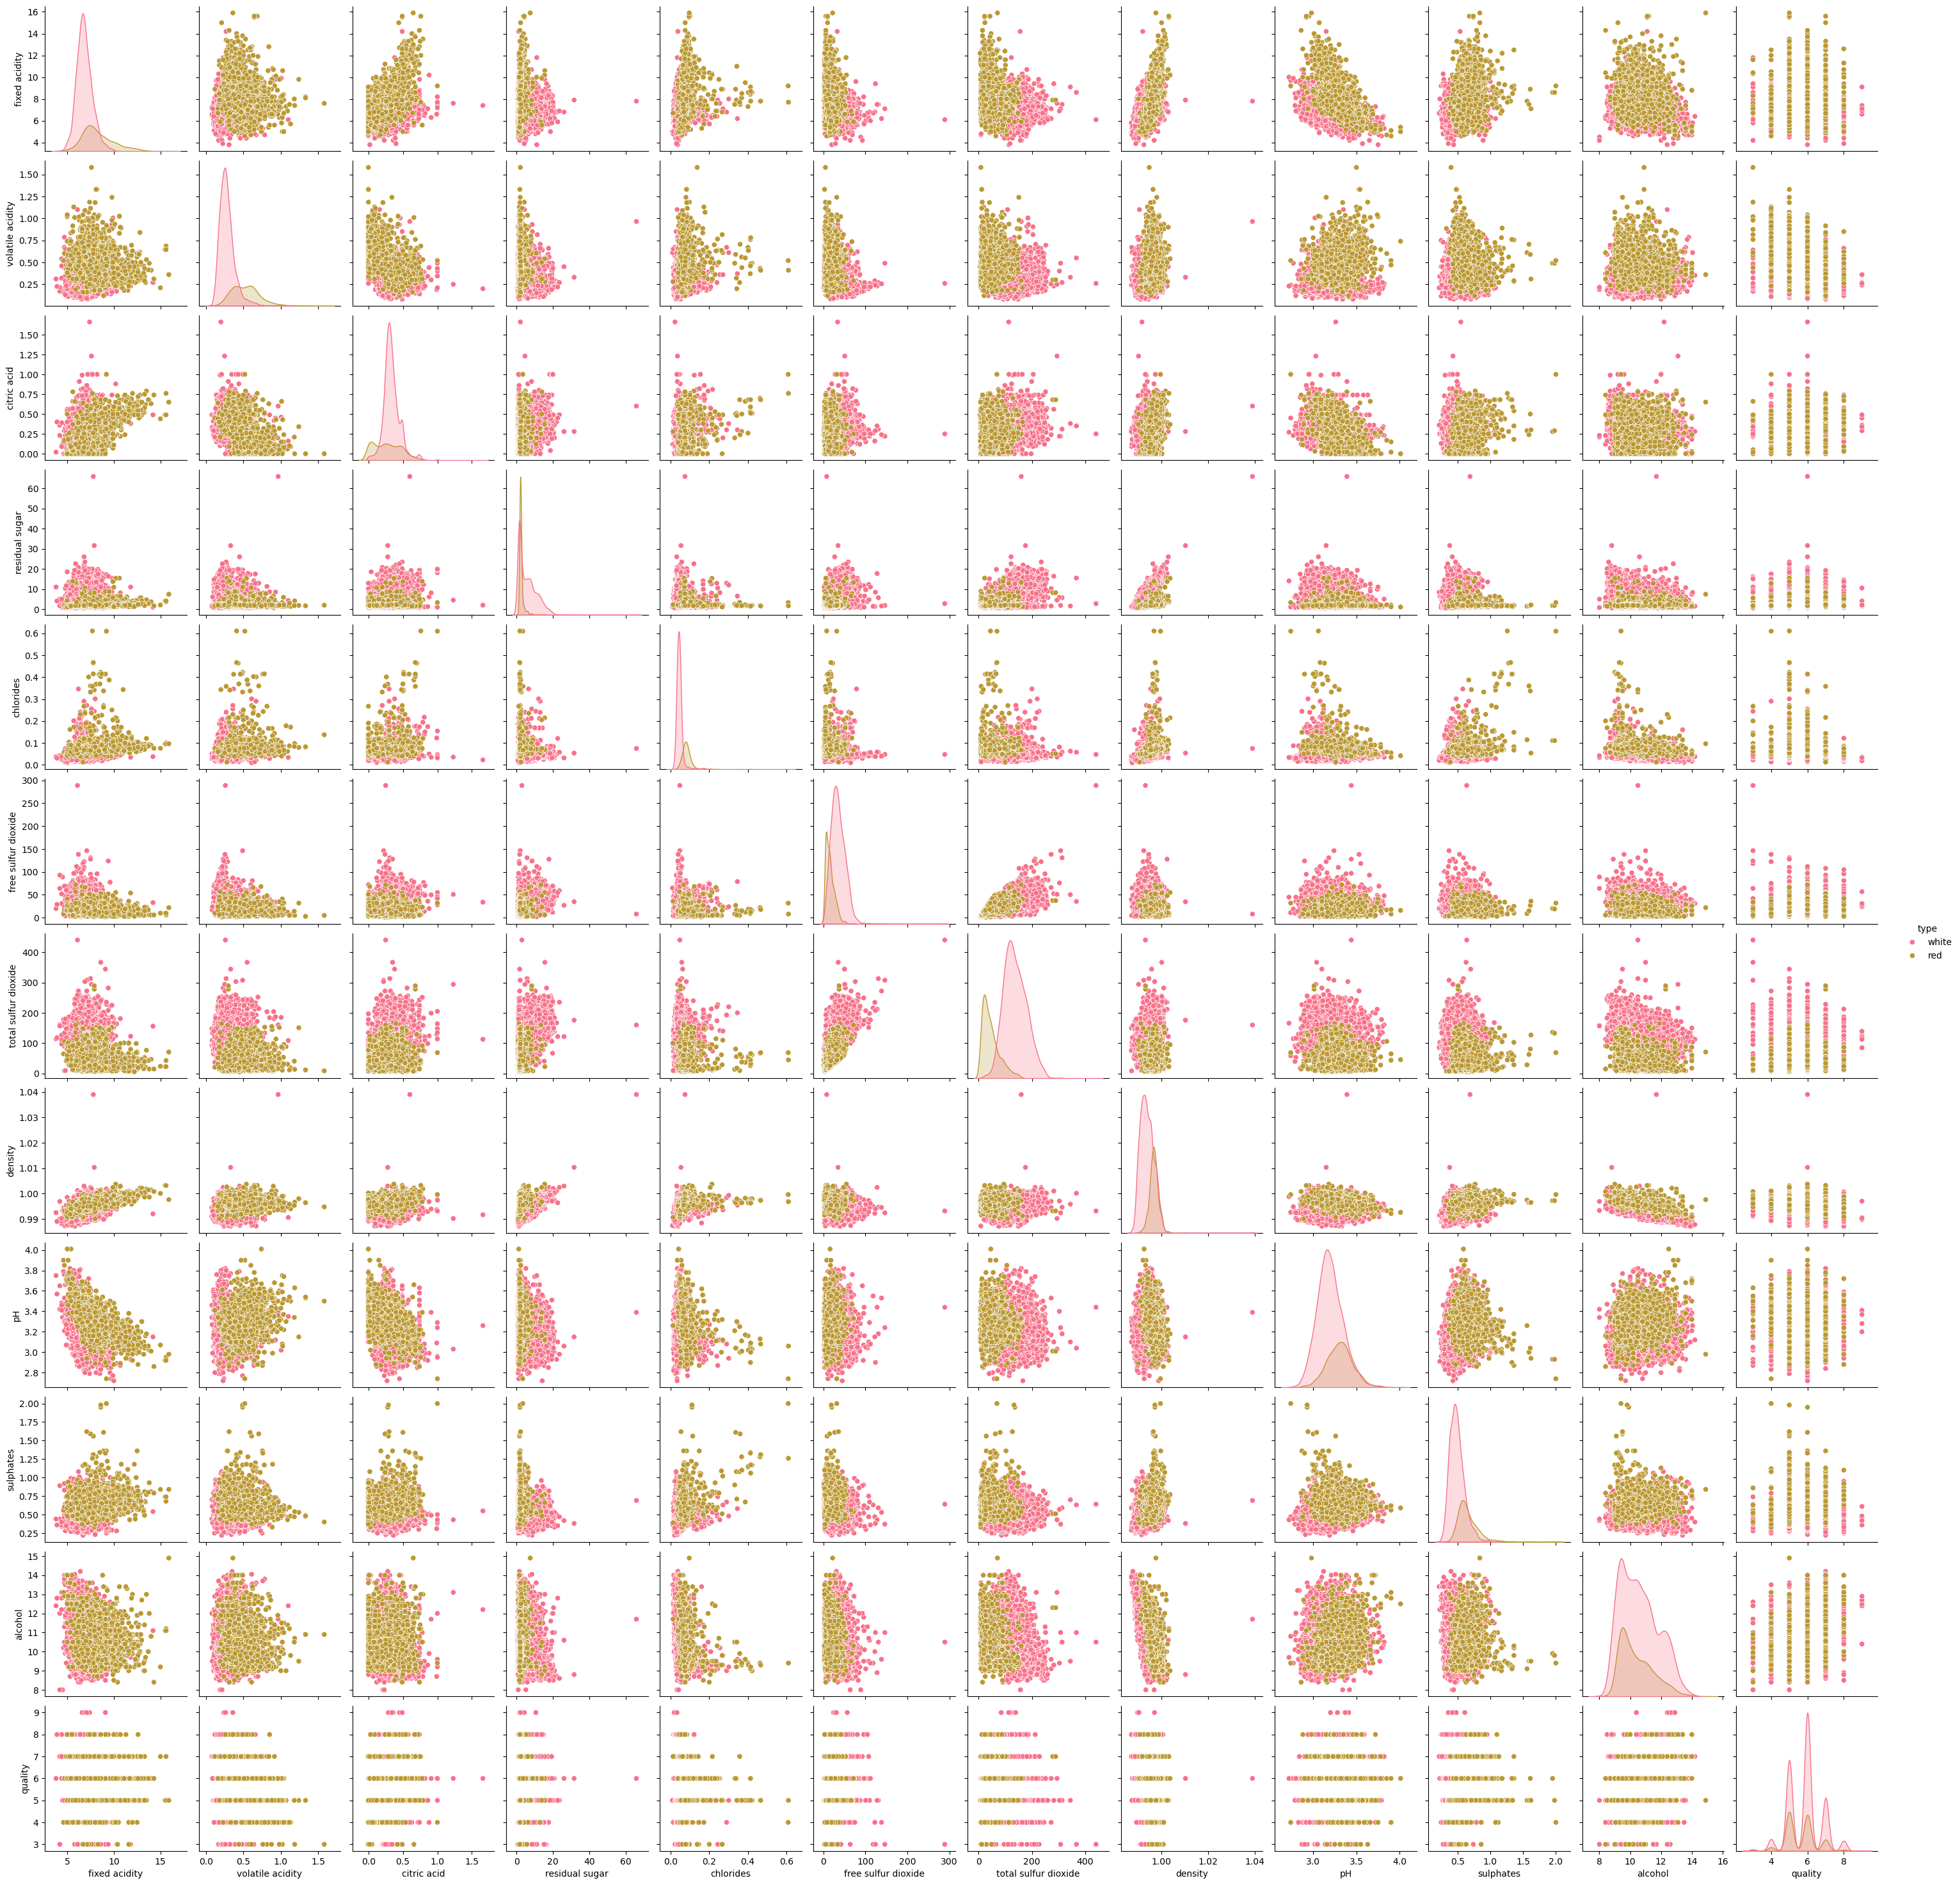

In [ ]:
# We want to see correlations between different features to see if they are redundant or not
# For this we filter out only values that are more than one standard deviation  away from the mean
explore_wine_df = wine_df.copy()

# Drop the quality as it is the outcome variable
# explore_wine_df = explore_wine_df.drop(['quality'], axis=1)

# explore_min = wine_df.mean() - wine_df.std()
# explore_max = wine_df.mean() + wine_df.std()


# for i in range(len(explore_wine_df.columns)):
#     # Do not do this for the type column
#     if i == (len(explore_wine_df.columns) - 1):
#         break
    
#     # Filter out values that are more than one standard deviation away from the mean
#     explore_wine_df = explore_wine_df[(explore_wine_df[explore_wine_df.columns[i]] > explore_min[i]) & (explore_wine_df[explore_wine_df.columns[i]] < explore_max[i])]
    
# print(len(explore_wine_df))
    
    
g = sns.pairplot(explore_wine_df, hue='type')
plt.show()

In [ ]:
# Encode the labels before inserting it 
from sklearn.preprocessing import LabelEncoder
print(wine_df.head())
le = LabelEncoder()
wine_df['type'] = le.fit_transform(wine_df['type'])
wine_df.head()

    type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
6  white            6.2              0.32         0.16             7.0   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
6      0.045                 30.0                 136.0   0.9949  3.18   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.4

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     1            7.0              0.27         0.36            20.7   
1     1            6.3              0.30         0.34             1.6   
2     1            8.1              0.28         0.40             6.9   
3     1            7.2              0.23         0.32             8.5   
6     1            6.2              0.32         0.16             7.0   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
6      0.045                 30.0                 136.0   0.9949  3.18   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
6       0.47      9.6        6

2023-11-17 13:39:50,006 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


2023-11-17 13:39:50,026 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


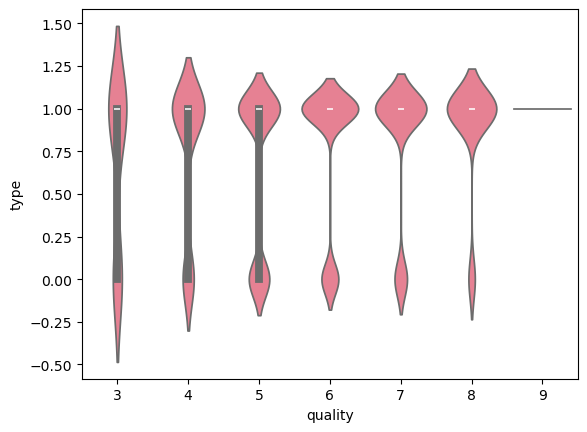

2023-11-17 13:39:50,477 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-17 13:39:50,493 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


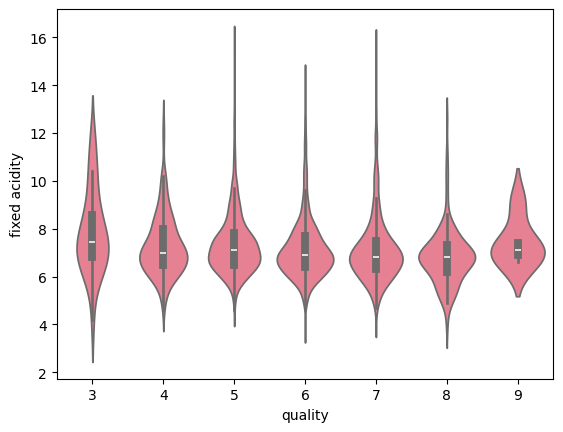

2023-11-17 13:39:51,856 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-17 13:39:51,873 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


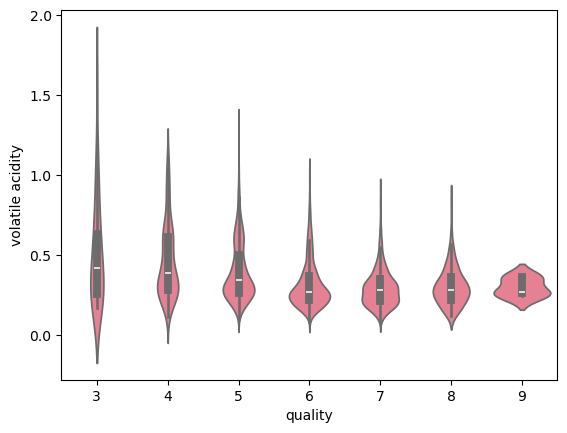

2023-11-17 13:39:52,227 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-17 13:39:52,248 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


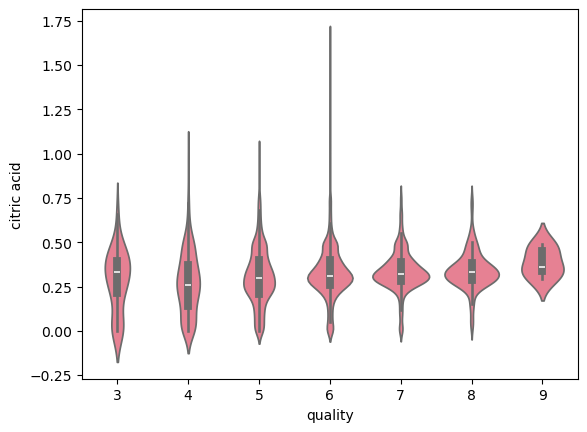

2023-11-17 13:39:52,576 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-17 13:39:52,589 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


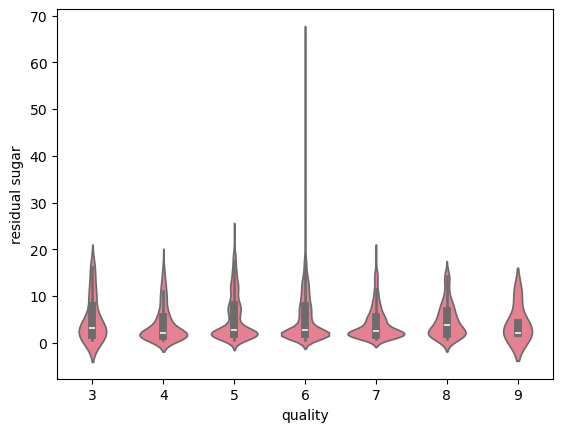

2023-11-17 13:39:52,896 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-17 13:39:52,909 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


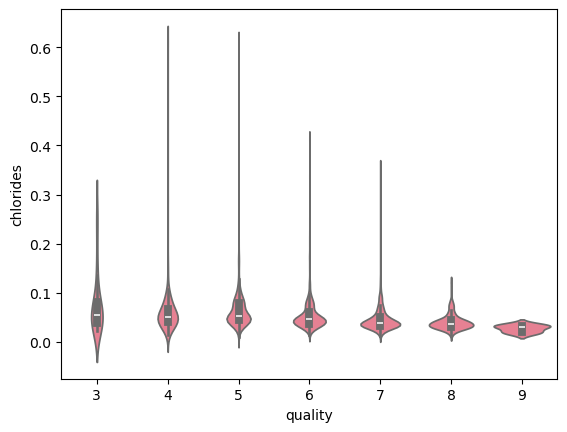

2023-11-17 13:39:53,227 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-17 13:39:53,241 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


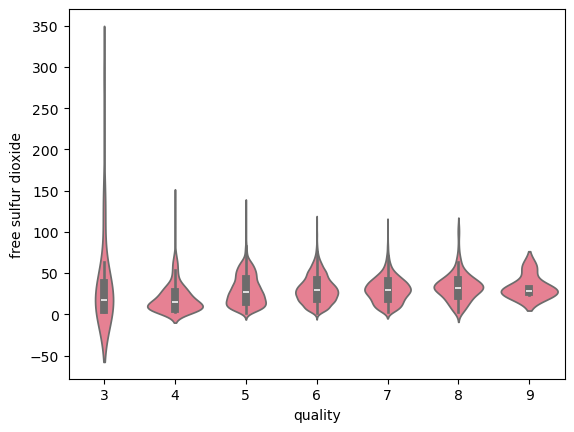

2023-11-17 13:39:53,550 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-17 13:39:53,561 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


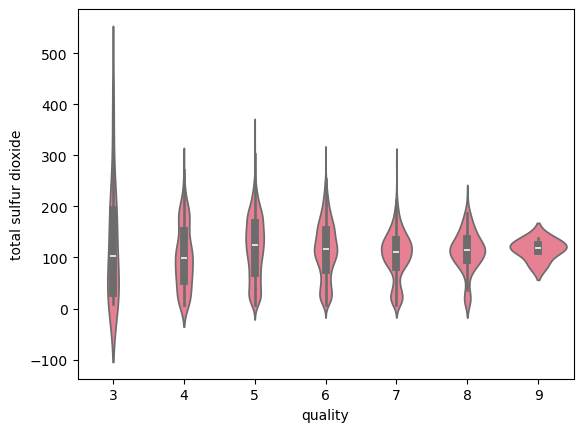

2023-11-17 13:39:53,885 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-17 13:39:53,898 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


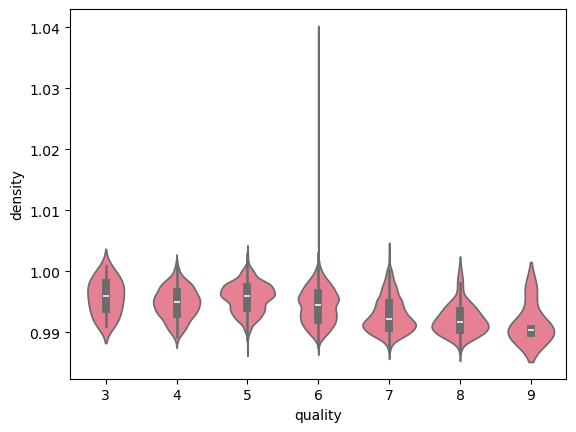

2023-11-17 13:39:54,205 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-17 13:39:54,216 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


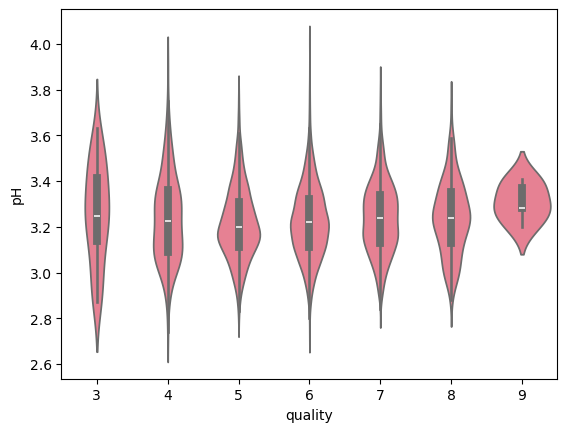

2023-11-17 13:39:54,635 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2023-11-17 13:39:54,648 INFO: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


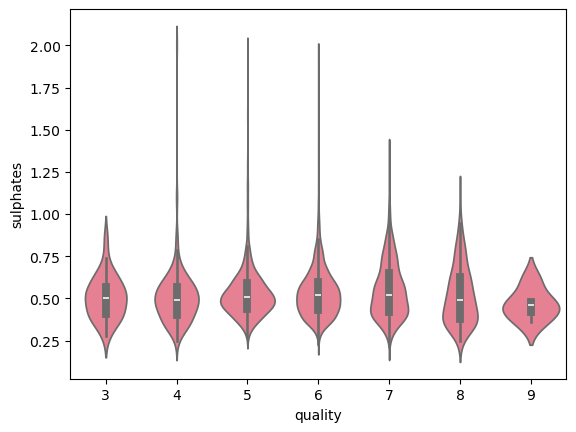

In [ ]:
# get the column names
cols = wine_df.columns.tolist()
 
# See for each of 'fixed acidity',  'volatile acidity',  'citric acid',  'residual sugar',  'chlorides',  'free sulfur dioxide',  'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'type' the distribution of the outcome variable
for col in cols[:-2]:
    sns.violinplot(x='quality', y=col, data=wine_df)
    plt.show()

In [ ]:
# We upload the data to the feature store
project = hopsworks.login()
fs = project.get_feature_store()

# Make the features lower case
wine_df.columns = wine_df.columns.str.lower()

# Replace the spaces in the column names by underscores
wine_df.columns = wine_df.columns.str.replace(' ', '_')

wine_fg = fs.get_or_create_feature_group(
    name="wine",
    version=1,
    primary_key=wine_df.columns.tolist(), 
    description="Wine dataset")
wine_fg.insert(wine_df)

Connection closed.
Connected. Call `.close()` to terminate connection gracefully.



Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/194708
Connected. Call `.close()` to terminate connection gracefully.
2023-11-17 13:41:47,116 INFO: 	13 expectation(s) included in expectation_suite.
Validation succeeded.
Validation Report saved successfully, explore a summary at https://c.app.hopsworks.ai:443/p/194708/fs/194627/fg/230765


Uploading Dataframe: 100.00% |██████████| Rows 5295/5295 | Elapsed Time: 00:05 | Remaining Time: 00:00


Launching job: wine_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/194708/jobs/named/wine_1_offline_fg_materialization/executions


(<hsfs.core.job.Job at 0x1bcb87f6e00>,
 {
   "statistics": {
     "evaluated_expectations": 13,
     "successful_expectations": 13,
     "unsuccessful_expectations": 0,
     "success_percent": 100.0
   },
   "evaluation_parameters": {},
   "meta": {
     "great_expectations_version": "0.14.13",
     "expectation_suite_name": "wine_dimensions",
     "run_id": {
       "run_name": null,
       "run_time": "2023-11-17T12:41:47.115728+00:00"
     },
     "batch_kwargs": {
       "ge_batch_id": "abc5f8fd-8546-11ee-90ce-e0d55e2d8920"
     },
     "batch_markers": {},
     "batch_parameters": {},
     "validation_time": "20231117T124147.115728Z",
     "expectation_suite_meta": {
       "great_expectations_version": "0.14.13"
     }
   },
   "success": true,
   "results": [
     {
       "result": {
         "element_count": 5295,
         "missing_count": 0,
         "missing_percent": 0.0,
         "unexpected_count": 0,
         "unexpected_percent": 0.0,
         "unexpected_percent_total"

In [ ]:
from great_expectations.core import ExpectationSuite, ExpectationConfiguration

def expect(suite, column, min_val, max_val):
    suite.add_expectation(
    ExpectationConfiguration(
        expectation_type="expect_column_values_to_be_between",
        kwargs={
            "column":column, 
            "min_value":min_val,
            "max_value":max_val,
        }
    )
)

In [ ]:
suite = ExpectationSuite(expectation_suite_name="wine_dimensions")

# We take the minimal and maximal value of each feature from the data exploration in wine_df as the boundaries for the expectations
wine_df_describe = wine_df.describe()
for col in wine_df_describe.columns:
    expect(suite, col, wine_df_describe[col]['min'], wine_df_describe[col]['max'])

wine_fg.save_expectation_suite(expectation_suite=suite, validation_ingestion_policy="STRICT")    

RestAPIError: Metadata operation error: (url: https://c.app.hopsworks.ai/hopsworks-api/api/project/194708/featurestores/194627/featuregroups/230765/expectationsuite). Server response: 
HTTP code: 409, HTTP reason: Conflict, body: b'{"errorCode":270208,"errorMsg":"An expectation suite is already attached to this feature group. Either update the existing suite via the update endpoint or delete it first."}', error code: 270208, error msg: An expectation suite is already attached to this feature group. Either update the existing suite via the update endpoint or delete it first., user msg: 

In [ ]:
wine_df.describe()

#I want the mean and standard deviation for each feature for all the qualities
for type in wine_df['type'].unique():
    # For each quality starting from 3 to 9 (10 - 1)
    for q in range(3,10):
        # we create a generate wine function that prints the mean and standard deviation for each feature
        print(f"generate_wine({q}",end="")
        for col in wine_df.columns:
            if (col != 'quality') & (col != 'type'):
                # Get the mean
                mean = wine_df[(wine_df['quality'] == q) & (wine_df['type'] == type)][col].mean()

                # Get the standard deviation
                std = wine_df[(wine_df['quality'] == q) & (wine_df['type'] == type)][col].std()

                # Print the mean and standard deviation
                print(f", {round(mean, 2)}, {round(std, 2)}", end="")

        print(f", {type})")



generate_wine(3, 7.6, 1.72, 0.33, 0.14, 0.34, 0.08, 6.39, 5.32, 0.05, 0.05, 53.32, 69.42, 170.6, 107.76, 0.99, 0.0, 3.19, 0.21, 0.47, 0.12, 10.34, 1.22, 1)
generate_wine(4, 7.12, 1.08, 0.38, 0.18, 0.3, 0.16, 4.46, 4.08, 0.05, 0.03, 23.25, 20.58, 124.4, 53.54, 0.99, 0.0, 3.19, 0.17, 0.48, 0.12, 10.2, 1.02, 1)
generate_wine(5, 6.92, 0.86, 0.3, 0.1, 0.34, 0.14, 6.93, 5.22, 0.05, 0.03, 36.01, 18.16, 150.07, 45.27, 1.0, 0.0, 3.17, 0.14, 0.48, 0.1, 9.87, 0.87, 1)
generate_wine(6, 6.82, 0.85, 0.26, 0.09, 0.34, 0.12, 5.97, 4.98, 0.05, 0.02, 35.33, 15.71, 136.5, 41.57, 0.99, 0.0, 3.2, 0.15, 0.49, 0.11, 10.65, 1.13, 1)
generate_wine(7, 6.7, 0.78, 0.27, 0.09, 0.33, 0.08, 4.54, 3.71, 0.04, 0.01, 33.91, 13.68, 122.09, 31.23, 0.99, 0.0, 3.23, 0.15, 0.5, 0.13, 11.52, 1.15, 1)
generate_wine(8, 6.61, 0.82, 0.29, 0.1, 0.34, 0.09, 5.06, 3.73, 0.04, 0.01, 35.62, 15.45, 122.03, 29.25, 0.99, 0.0, 3.24, 0.15, 0.49, 0.15, 11.88, 1.06, 1)
generate_wine(9, 7.42, 0.98, 0.3, 0.06, 0.39, 0.08, 4.12, 3.76, 0.03, 0.